## Challenge: Validating a linear regression

Now that you've spent some time playing with a sample multivariate linear regression model, it's time to make your own.

You've already gotten started by prepping the [FBI:UCR Crime dataset](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls)  in a previous assignment.

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Information about the Dataset
#### Offenses Known to Law Enforcement, by State by City, 2013.
The FBI collects these data through the Uniform Crime Reporting (UCR) Program.

#### Important note about rape data
In 2013, the FBI UCR Program initiated the collection of rape data within the Summary Reporting System under a revised definition. The term “forcible” was removed from the offense name, and the definition changed to the revised UCR definition below.

Legacy UCR definition of rape: The carnal knowledge of a female forcibly and againsther will.
Revised UCR definition of rape: Penetration, no matter how slight, of the vagina or anus with any body part or object, or oral penetration by a sex organ of another person, without the consent of the victim.

#### General comment
This table provides the volume of violent crime (murder and nonnegligent manslaughter, rape, robbery, and aggravated assault) and property crime (burglary, larceny-theft, and motor vehicle theft) as reported by city and town law enforcement agencies (listed alphabetically by state) that contributed data to the UCR Program. (Note: Arson is not included in the property crime total in this table; however, if complete arson data were provided, they will appear in the arson column.)

#### Caution against ranking
Readers should take into consideration relevant factors in addition to an area’s crime statistics when making any valid comparisons of crime among different locales. UCR Statistics: Their Proper Use provides more details.

#### Methodology
• The data used in creating this table were from all city and town law enforcement

agencies submitting 12 months of complete offense data for 2013.
• The FBI does not publish arson data unless it receives data from either theagency or the state for all 12 months of the calendar year.

• When the FBI determines that an agency’s data collection methodology does not comply with national UCR guidelines, the figure(s) for that agency’s offense(s) will not be included in the table, and the discrepancy will be explained in a footnote.

#### Population estimation
For the 2013 population estimates used in this table, the FBI computed individual rates of growth from one year to the next for every city/town and county using 2010 decennial population counts and 2011 through 2012 population estimates from the U.S. Census
Bureau. Each agency’s rates of growth were averaged; that average was then applied and added to its 2012 Census population estimate to derive the agency’s 2013 population estimate.

In [2]:
crime = pd.read_excel("reg multi.xlsx")
crime

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan
5,Alfred Village,4089.000,5.000,0.000,nan,0.000,3.000,2.000,46.000,10.000,36.000,0.000,nan
6,Allegany Village,1781.000,3.000,0.000,nan,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000
7,Amherst Town,118296.000,107.000,1.000,nan,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000
8,Amityville Village,9519.000,9.000,0.000,nan,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000
9,Amsterdam,18182.000,30.000,0.000,nan,0.000,12.000,18.000,405.000,99.000,291.000,15.000,0.000


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 13 columns):
City                                    348 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.5+ KB


In [4]:
crime.count()

City                                      348
Population                                348
Violent\ncrime                            348
Murder and\nnonnegligent\nmanslaughter    348
Rape\n(revised\ndefinition)1                0
Rape\n(legacy\ndefinition)2               348
Robbery                                   348
Aggravated\nassault                       348
Property\ncrime                           348
Burglary                                  348
Larceny-\ntheft                           348
Motor\nvehicle\ntheft                     348
Arson3                                    187
dtype: int64

### Property Crime
In the FBI’s Uniform Crime Reporting (UCR) Program, property crime includes the offenses of burglary, larceny-theft, motor vehicle theft, and arson. The object of the theft-type offenses is the taking of money or property, but there is no force or threat of force against the victims. The property crime category includes arson because the offense involves the destruction of property; however, arson victims may be subjected to force. Because of limited participation and varying collection procedures by local law enforcement agencies, only limited data are available for arson. Arson statistics are included in trend, clearance, and arrest tables throughout Crime in the United States, but they are not included in any estimated volume data. The arson section in this report provides more information on that offense.


#### Data Cleaning
Let's now see if there are any values that are not shown i nthe dataset, and need to be cleaned.


In [5]:
crime.isnull().values.ravel().sum()

522

In [6]:
cro = crime.drop(['Arson3', 'Rape\n(revised\ndefinition)1'], axis=1)

In [7]:
cro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 11 columns):
City                                    348 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
dtypes: float64(10), object(1)
memory usage: 30.1+ KB


In [8]:
cro.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft'],
      dtype='object')

In [9]:
cro = cro.fillna(0)
cro.tail(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
344,Woodridge Village,829.000,7.000,0.000,0.000,0.000,7.000,17.000,8.000,9.000,0.000
345,Woodstock Town,5931.000,2.000,0.000,0.000,0.000,2.000,58.000,13.000,45.000,0.000
346,Yonkers,199134.000,1036.000,6.000,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000
347,Yorktown Town,36643.000,15.000,0.000,0.000,2.000,13.000,334.000,45.000,287.000,2.000
348,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [10]:
cro = cro.drop(cro.index[-1])
cro.tail(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
343,Woodbury Town,10685.000,3.000,0.000,0.000,2.000,1.000,541.000,9.000,529.000,3.000
344,Woodridge Village,829.000,7.000,0.000,0.000,0.000,7.000,17.000,8.000,9.000,0.000
345,Woodstock Town,5931.000,2.000,0.000,0.000,0.000,2.000,58.000,13.000,45.000,0.000
346,Yonkers,199134.000,1036.000,6.000,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000
347,Yorktown Town,36643.000,15.000,0.000,0.000,2.000,13.000,334.000,45.000,287.000,2.000


In [11]:
cro.isnull().values.ravel().sum()

0

In [12]:
null_columns=cro.columns[cro.isnull().any()]
cro[null_columns].isnull().sum()
#print(Murd.isnull()[null_columns])

Series([], dtype: float64)

In [13]:
cro['Pop2'] = cro["Population"]**2
cro['Pop2'].head(5)

0      3463321.000
1      6640929.000
2      8099716.000
3   9595377936.000
4     40806544.000
Name: Pop2, dtype: float64

In [14]:
cro.rename(columns={'Murder and\nnonnegligent\nmanslaughter': 'Murd'}, inplace=True)
cromurd= cro['Murd']
cromurd.tail(5)

343   0.000
344   0.000
345   0.000
346   6.000
347   0.000
Name: Murd, dtype: float64

In [15]:
cro.rename(columns={'Property\ncrime': 'pcrime'}, inplace=True)


In [16]:
Murd= cromurd
Murd= Murd.astype('int')


In [17]:
cro.dtypes

City                            object
Population                     float64
Violent\ncrime                 float64
Murd                           float64
Rape\n(legacy\ndefinition)2    float64
Robbery                        float64
Aggravated\nassault            float64
pcrime                         float64
Burglary                       float64
Larceny-\ntheft                float64
Motor\nvehicle\ntheft          float64
Pop2                           float64
dtype: object

In [18]:
Murd = np.where(Murd >0, 1, 0)
cro.head(10)


,City,Population,Violent crime,Murd,Rape (legacy definition)2,Robbery,Aggravated assault,pcrime,Burglary,Larceny- theft,Motor vehicle theft,Pop2
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,3463321.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,6640929.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,8099716.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,9595377936.000
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,40806544.000
5,Alfred Village,4089.000,5.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000,16719921.000
6,Allegany Village,1781.000,3.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000,3171961.000
7,Amherst Town,118296.000,107.000,1.000,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,13993943616.000
8,Amityville Village,9519.000,9.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000,90611361.000
9,Amsterdam,18182.000,30.000,0.000,0.000,12.000,18.000,405.000,99.000,291.000,15.000,330585124.000


In [19]:
cro['Robbery']= cro['Robbery'].astype('int')


In [20]:

cro['Rob']=np.where(cro['Robbery']>0, 1, 0)
cro.head(10)



,City,Population,Violent crime,Murd,Rape (legacy definition)2,Robbery,Aggravated assault,pcrime,Burglary,Larceny- theft,Motor vehicle theft,Pop2,Rob
0,Adams Village,1861.000,0.000,0.000,0.000,0,0.000,12.000,2.000,10.000,0.000,3463321.000,0
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0,3.000,24.000,3.000,20.000,1.000,6640929.000,0
2,Akron Village,2846.000,3.000,0.000,0.000,0,3.000,16.000,1.000,15.000,0.000,8099716.000,0
3,Albany,97956.000,791.000,8.000,30.000,227,526.000,4090.000,705.000,3243.000,142.000,9595377936.000,1
4,Albion Village,6388.000,23.000,0.000,3.000,4,16.000,223.000,53.000,165.000,5.000,40806544.000,1
5,Alfred Village,4089.000,5.000,0.000,0.000,3,2.000,46.000,10.000,36.000,0.000,16719921.000,1
6,Allegany Village,1781.000,3.000,0.000,0.000,0,3.000,10.000,0.000,10.000,0.000,3171961.000,0
7,Amherst Town,118296.000,107.000,1.000,7.000,31,68.000,2118.000,204.000,1882.000,32.000,13993943616.000,1
8,Amityville Village,9519.000,9.000,0.000,2.000,4,3.000,210.000,16.000,188.000,6.000,90611361.000,1
9,Amsterdam,18182.000,30.000,0.000,0.000,12,18.000,405.000,99.000,291.000,15.000,330585124.000,1


In [21]:
Pcrime = cro[['pcrime','Population','Pop2','Murd','Rob']]
Pcrime.head(5)

,pcrime,Population,Pop2,Murd,Rob
0,12.000,1861.000,3463321.000,0.000,0
1,24.000,2577.000,6640929.000,0.000,0
2,16.000,2846.000,8099716.000,0.000,0
3,4090.000,97956.000,9595377936.000,8.000,1
4,223.000,6388.000,40806544.000,0.000,1


## CLEANING IS OVER. NOW THE REAL CHALLENGE

In [22]:
import seaborn as sns
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler


# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [23]:
scaler = MinMaxScaler()

Pcrime = pd.DataFrame(scaler.fit_transform(Pcrime), columns=Pcrime.columns)
Pcrime.head()

,pcrime,Population,Pop2,Murd,Rob
0,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000
3,0.029,0.012,0.000,0.024,1.000
4,0.002,0.001,0.000,0.000,1.000


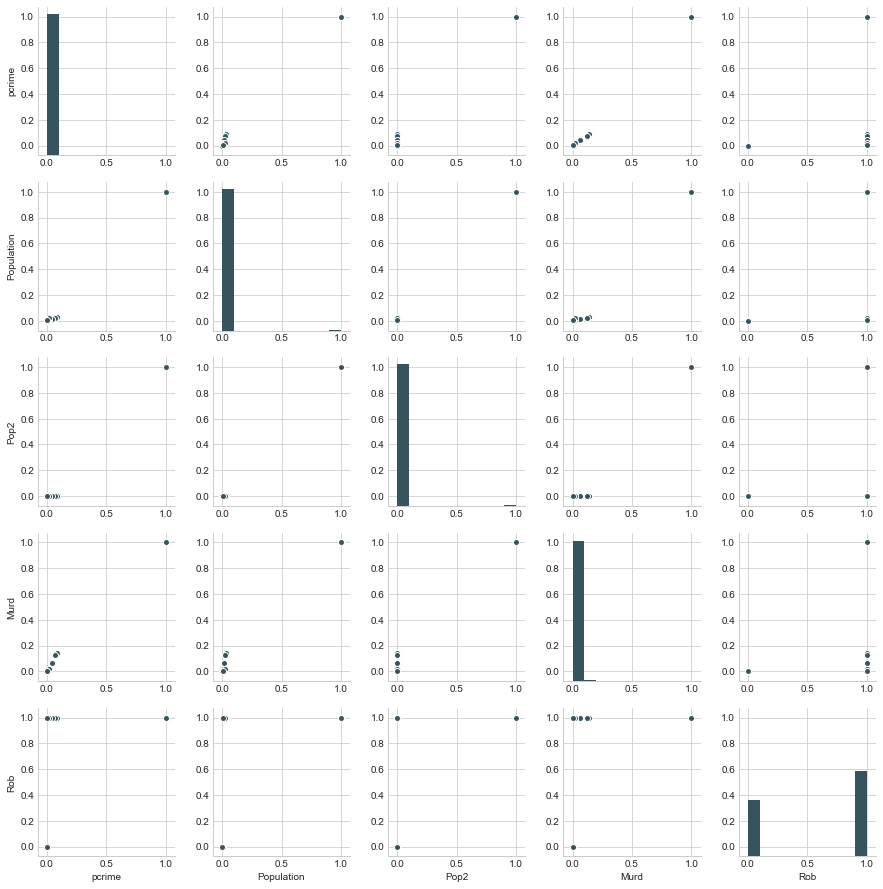

In [24]:
sns.pairplot(Pcrime)

## train

In [25]:
X =Pcrime[['Population','Pop2','Murd','Rob']]
y=Pcrime['pcrime'] #.values.reshape(-1, 1)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)




In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  1.19274625e+00  -1.58879229e+01   4.41666437e-01   4.39615153e-04]


In [28]:
print(lm.intercept_)

-0.000257861691136


In [29]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Population,1.193
Pop2,-15.888
Murd,0.442
Rob,0.000


## test

In [30]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

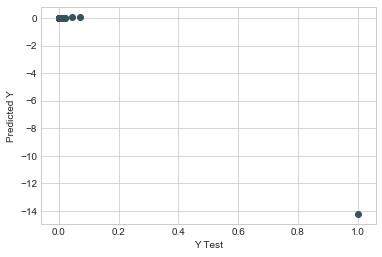

In [31]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

regr = linear_model.LinearRegression()


x1 =Pcrime[['Population','Pop2','Murd','Rob']]
y=Pcrime['pcrime'] #.values.reshape(-1, 1)
# Fit our model to our data.
regr.fit(x1, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_) 
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')

#sqrt_feature = [math.sqrt(x) for x in  x1]



# Plot outputs
plt.scatter(x1, y, color='black')
plt.plot(x1, regr.predict(x), color='blue', linewidth=3)
plt.show()

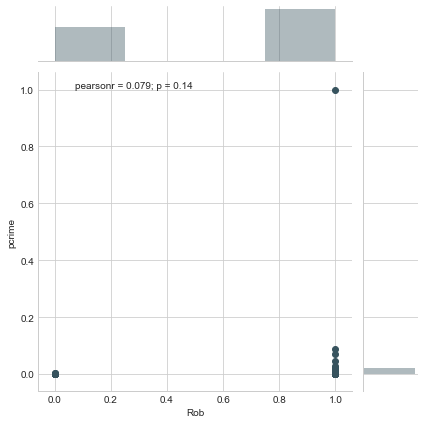

In [32]:
sns.jointplot(x='Rob',y='pcrime',data=Pcrime)

correlation_matrix = x1.corr()
display(correlation_matrix)


from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 



cro['Murd'] = (cro['Murd'] - cro['Murd'].mean()) / cro['Murd'].std()
cro['Rob'] = (cro['Rob'] - cro['Rob'].mean()) / cro['Rob'].std()




t = sns.regplot(
    'Murd',
    'Rob',
    cro,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

correlation_matrix = x1.corr()
display(correlation_matrix)

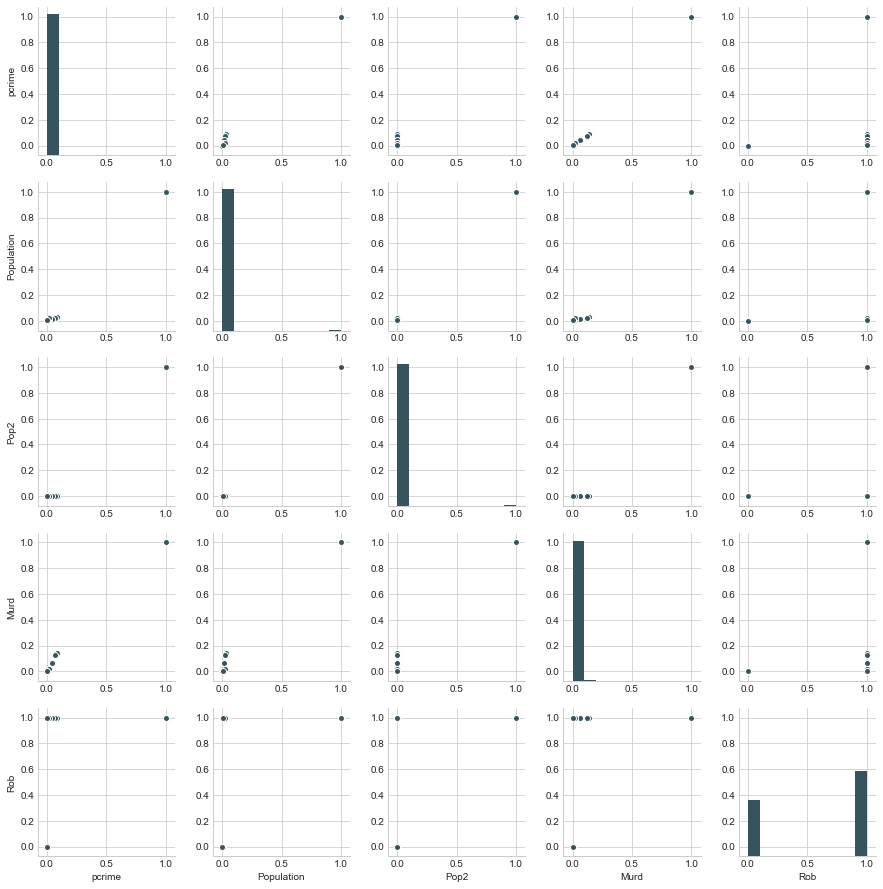

In [34]:
sns.pairplot(Pcrime)

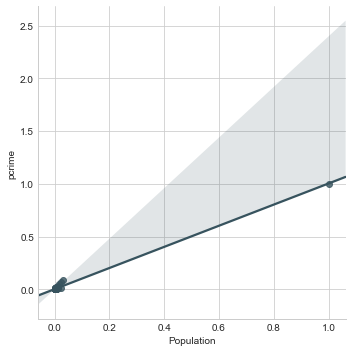

In [35]:
sns.lmplot(x='Population',y='pcrime',data=Pcrime)

### Validating regression models for prediction
Statistical tests are useful for making sure a model is a good fit to the test data, and that all the features are useful to the model. However, to make sure a model has good predictive validity for new data, it is necessary to assess the performance of the model on new datasets.

The procedure is the same as what you learned in the Naive Bayes lesson – the holdout method and cross-validation method are both available. You've already had experience writing code to run these kinds of validation models for Naive Bayes: now you can try it again with linear regression. In this case, your goal is to achieve a model with a consistent R2 and only statistically significant parameters across multiple samples.

We'll use the property crime model you've been working on with, based on the FBI:UCR data. Since your model formulation to date has used the entire New York State 2013 dataset, you'll need to validate it using some of the other crime datasets available at the FBI:UCR website. Options include other states crime rates in 2013 or crime rates in New York State in other years or a combination of these.

### Iterate
Based on the results of your validation test, create a revised model, and then test both old and new models on a new holdout or set of folds.

Include your model(s) and a brief writeup of the reasoning behind the validation method you chose and the changes you made to submit and review with your mentor.

In [36]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [37]:
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'pcrime ~ Population+Pop2+Murd+Rob'

In [38]:
lm = smf.ols(formula=linear_formula, data=Pcrime).fit()

In [39]:
lm.params

Intercept    -0.000
Population    0.974
Pop2         -0.362
Murd          0.388
Rob           0.001
dtype: float64

In [40]:
lm.rsquared

0.99873131273100502

In [41]:
lm.conf_int()

,0,1
Intercept,-0.000,0.000
Population,0.868,1.080
Pop2,-0.448,-0.276
Murd,0.359,0.416
Rob,0.000,0.001


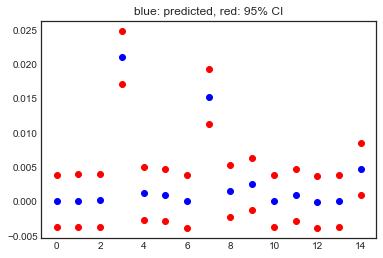

In [42]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [43]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

## Dimensionality Reduction in Linear Regression

Having a lot of features can cause problems. The more features in your regression the more complex the model, and the longer it takes to run.  Variance in the features that is unrelated to the outcome $Y$ may create noise in predictions (especially when that variance is shared among features in multicollinearity), and more features also means more unrelated variance and thus more noise.  Sometimes there may be more predictors than datapoints, leading to negative degrees of freedom and a model that won't run.  For these reasons, data scientists interested solely in building a prediction model (with no interest in interpreting the individual parameters) may turn to dimension reduction methods to simplify their feature space while retaining all the predictive power of the original model.

The idea is to reduce a matrix of features $X$ into a matrix with fewer columns $R(X)$ where the expected value of $Y$ given $X$ ($E(Y|X)$) is equal to the expected value of $Y$ given $R(X)$. We say "expected value" rather than "predicted value" to be consistent with the commonly-used mathematical notation, but the meaning is the same – we want a smaller set of features that will produce the same predicted values for $Y$ as our larger number of features.

If this is sounding a lot like PCA, you're right.  The difference is that instead of trying to reduce a set of $X$ into a smaller set $R(X)$ that contains all the variance in $X$, we are trying to reduce a set of $X$ into an $R(X)$ that contains all the variance in $X$ that is shared with $Y$.  


## Partial least squares regression

We call this method **partial least squares regression**, or "PLSR". As in PCA, PLSR is iterative. It first tries to find the vector within the $n$-dimensional space of $X$ with the highest covariance with $y$.  Then it looks for a second vector, perpendicular to the first, that explains the highest covariance with $y$ that remains after accounting for the first vector. This continues for as many components as we permit, up to $n$.

SciKit-learn has a function to run PLSR:

In [47]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
#X = np.random.normal(size=n * p).reshape((n, p))
X =Pcrime[['Population','Pop2','Murd','Rob']]
#y=Pcrime['pcrime'] #.values.reshape(-1, 1)


# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

TypeError: unhashable type: 'slice'

R-squared regression: 0.998731312731
R-squared PLSR: 0.998138258093


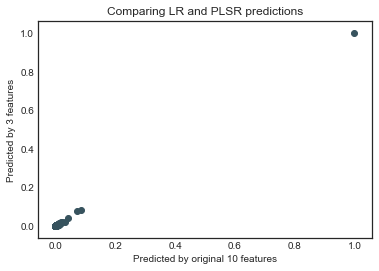

In [48]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()